# Generalized Model to predict All NBA Selections

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import Image

pd.options.mode.chained_assignment = None
data = pd.read_csv('StatsAfterAllNBAInsertion.csv')

In [2]:
data.describe()

,Year,Age,All NBA,All NBA Acc,All NBA Total Career,G,GS,MP,MPpG,PER,...,STL,STLpG,BLK,BLKpG,TOV,TOVpG,PF,PFpG,PTS,PTSpG
count,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15095.000000,...,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000
mean,2004.197550,26.984834,0.027483,0.276358,0.430993,48.339603,23.073907,1130.345695,19.823603,12.399821,...,36.770662,0.642278,23.103245,0.398854,67.158808,1.190523,101.926821,1.864801,461.931854,7.824821
std,7.998757,4.149146,0.163493,1.305299,1.765006,26.478508,28.236547,915.995235,10.293082,6.282646,...,36.014443,0.466536,34.770722,0.497782,62.887391,0.794410,76.944305,0.851711,461.987449,5.834517
min,1990.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-90.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,24.000000,0.000000,0.000000,0.000000,25.000000,0.000000,292.000000,11.200000,9.600000,...,8.000000,0.300000,3.000000,0.100000,16.000000,0.600000,32.000000,1.200000,86.000000,3.300000
50%,2005.000000,26.000000,0.000000,0.000000,0.000000,52.000000,8.000000,940.000000,18.900000,12.600000,...,27.000000,0.600000,11.000000,0.200000,50.000000,1.000000,92.000000,1.900000,317.000000,6.300000
75%,2011.000000,30.000000,0.000000,0.000000,0.000000,74.000000,43.000000,1835.250000,28.300000,15.600000,...,55.000000,0.900000,28.000000,0.500000,102.000000,1.600000,159.000000,2.500000,713.250000,11.200000
max,2017.000000,44.000000,1.000000,15.000000,15.000000,85.000000,83.000000,3533.000000,44.500000,129.100000,...,246.000000,3.500000,376.000000,6.000000,464.000000,5.700000,371.000000,6.000000,2832.000000,35.400000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 68 columns):
Year                    15100 non-null int64
Player                  15100 non-null object
Age                     15100 non-null int64
Pos                     15100 non-null object
All NBA                 15100 non-null int64
All NBA Acc             15100 non-null int64
All NBA Total Career    15100 non-null int64
G                       15100 non-null int64
GS                      15100 non-null int64
MP                      15100 non-null int64
MPpG                    15100 non-null float64
PER                     15095 non-null float64
TS%                     15029 non-null float64
3PAr                    15020 non-null float64
FTr                     15020 non-null float64
ORB%                    15095 non-null float64
DRB%                    15095 non-null float64
TRB%                    15095 non-null float64
AST%                    15095 non-null float64
STL%            

In [4]:
# Fill in blanks/NAs

data['PER'] = data['PER'].fillna(data['PER'].median())
data['TS%'] = data['TS%'].fillna(data['TS%'].median())
data['3PAr'] = data['3PAr'].fillna(data['3PAr'].median())
data['FTr'] = data['FTr'].fillna(data['FTr'].median())
data['ORB%'] = data['ORB%'].fillna(data['ORB%'].median())
data['DRB%'] = data['DRB%'].fillna(data['DRB%'].median())
data['TRB%'] = data['TRB%'].fillna(data['TRB%'].median())
data['AST%'] = data['AST%'].fillna(data['AST%'].median())
data['STL%'] = data['STL%'].fillna(data['STL%'].median())
data['BLK%'] = data['BLK%'].fillna(data['BLK%'].median())
data['TOV%'] = data['TOV%'].fillna(data['TOV%'].median())
data['USG%'] = data['USG%'].fillna(data['USG%'].median())
data['WS/48'] = data['WS/48'].fillna(data['WS/48'].median())
data['FG%'] = data['FG%'].fillna(data['FG%'].median())
data['3P%'] = data['3P%'].fillna(data['3P%'].median())
data['2P%'] = data['2P%'].fillna(data['2P%'].median())
data['eFG%'] = data['eFG%'].fillna(data['eFG%'].median())
data['FT%'] = data['FT%'].fillna(data['FT%'].median())


In [5]:
data.Pos.unique()

array(['PF', 'SF', 'C', 'SG', 'PG', 'SG-SF', 'PF-C', 'SF-PF', 'PF-SF',
       'SG-PG', 'PG-SG', 'C-PF', 'C-SF', 'SF-SG', 'PG-SF', 'SG-PF'],
      dtype=object)

In [6]:
#Give Position numerical labels

le = preprocessing.LabelEncoder()
data['Pos'] = le.fit_transform(data['Pos'].astype(str))
le_Pos_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_Pos_mapping)

{'C': 0, 'C-PF': 1, 'C-SF': 2, 'PF': 3, 'PF-C': 4, 'PF-SF': 5, 'PG': 6, 'PG-SF': 7, 'PG-SG': 8, 'SF': 9, 'SF-PF': 10, 'SF-SG': 11, 'SG': 12, 'SG-PF': 13, 'SG-PG': 14, 'SG-SF': 15}


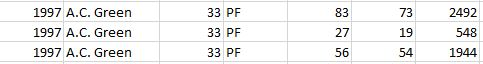

In [7]:
Image("duplicateNBA.jpg")

In [8]:
# Delete duplicate, split Data that occured when Player transferred mid season illustrated in above's image

check = 0
index = 0
for year in data['Year']:
    if (check != year):
        check = year
        index = index + 1
        continue
    #remove row using index
    data = data.drop(index)
    index = index + 1

In [9]:
# Check if duplicate deletion was successful

def checkForDuplicates(dataframe):
    check = 0
    count = 0
    for year in dataframe['Year']:
        if (count == 2):
            return True
        if (check != year):
            check = year
            count = 0
            continue
        count = count + 1
        continue
    return False

In [10]:
print(checkForDuplicates(data))

False


In [11]:
data.describe()

,Year,Age,Pos,All NBA,All NBA Acc,All NBA Total Career,G,GS,MP,MPpG,...,STL,STLpG,BLK,BLKpG,TOV,TOVpG,PF,PFpG,PTS,PTSpG
count,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,...,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.00000,12219.000000,12219.000000
mean,2003.997217,26.949505,5.904166,0.033718,0.312955,0.496358,54.075211,26.483182,1280.981750,20.566208,...,41.714379,0.666454,26.458384,0.422179,76.029790,1.229888,115.083313,1.91911,526.192978,8.213725
std,7.995671,4.213603,4.284325,0.180510,1.395725,1.904681,24.976332,29.590902,925.777987,10.262107,...,37.332904,0.469495,36.990469,0.508466,64.856059,0.799250,76.999472,0.83143,478.698506,5.949535
min,1990.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1997.000000,24.000000,3.000000,0.000000,0.000000,0.000000,35.000000,1.000000,425.500000,12.000000,...,11.000000,0.300000,4.000000,0.100000,22.000000,0.600000,47.000000,1.30000,126.000000,3.500000
50%,2004.000000,26.000000,6.000000,0.000000,0.000000,0.000000,62.000000,12.000000,1196.000000,19.900000,...,33.000000,0.600000,13.000000,0.300000,61.000000,1.100000,114.000000,1.90000,402.000000,6.700000
75%,2011.000000,30.000000,9.000000,0.000000,0.000000,0.000000,76.000000,53.000000,2035.000000,29.200000,...,62.000000,0.900000,33.000000,0.500000,113.000000,1.700000,173.000000,2.50000,807.000000,11.700000
max,2017.000000,44.000000,15.000000,1.000000,15.000000,15.000000,85.000000,83.000000,3533.000000,43.700000,...,246.000000,3.000000,376.000000,4.600000,464.000000,5.700000,371.000000,6.00000,2832.000000,35.400000


In [12]:
# Drop irrelevant features

# Model should not derive an All NBA Selection just by using a name or a year
data = data.drop('Player', axis=1)
data = data.drop('Year', axis=1)
#data = data.drop('All NBA', axis=1)

# Too many outliers, for instance min -90.6 and max 129.1
data = data.drop('PER', axis=1)
data = data.drop('All NBA Acc', axis=1)
data.head()

,Age,Pos,All NBA,All NBA Total Career,G,GS,MP,MPpG,TS%,3PAr,...,STL,STLpG,BLK,BLKpG,TOV,TOVpG,PF,PFpG,PTS,PTSpG
0,26,3,0,0,82,82,2709,33.0,0.548,0.057,...,66,0.8,50,0.6,116,1.4,207,2.5,1061,12.9
1,27,3,0,0,82,21,2164,26.4,0.556,0.101,...,59,0.7,23,0.3,99,1.2,117,1.4,750,9.1
2,28,3,0,0,82,53,2902,35.4,0.556,0.070,...,91,1.1,36,0.4,111,1.4,141,1.7,1116,13.6
3,29,3,0,0,82,55,2819,34.4,0.603,0.065,...,88,1.1,39,0.5,116,1.4,149,1.8,1051,12.8
4,30,3,0,0,82,55,2825,34.5,0.555,0.038,...,70,0.9,38,0.5,100,1.2,142,1.7,1204,14.7


In [13]:
# Let algorithm find highly correlated feature for deletion purposes 
# Create correlation matrix

corr_matrix = data.corr().abs()

In [14]:
# Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['FGA',
 'FGApG',
 '3PpG',
 '3PA',
 '3PApG',
 '2P',
 '2PA',
 'FTA',
 'FTApG',
 'TRB',
 'TRBpG',
 'PTS',
 'PTSpG']

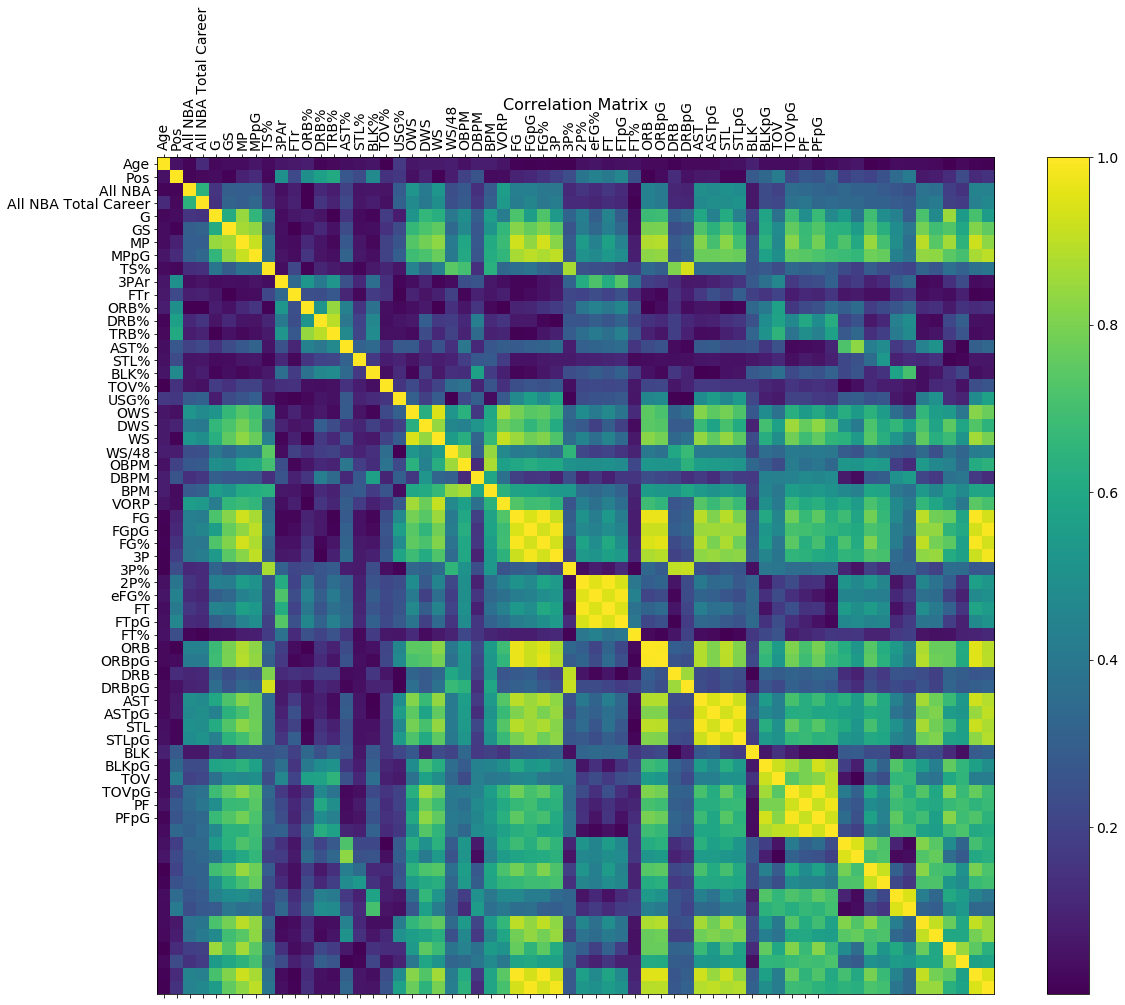

In [20]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [17]:
# Drop the highly corelated features from dataframe

for feature in to_drop:
    if (feature == 'All NBA Total Career'):
        continue
    data = data.drop(feature, axis=1)

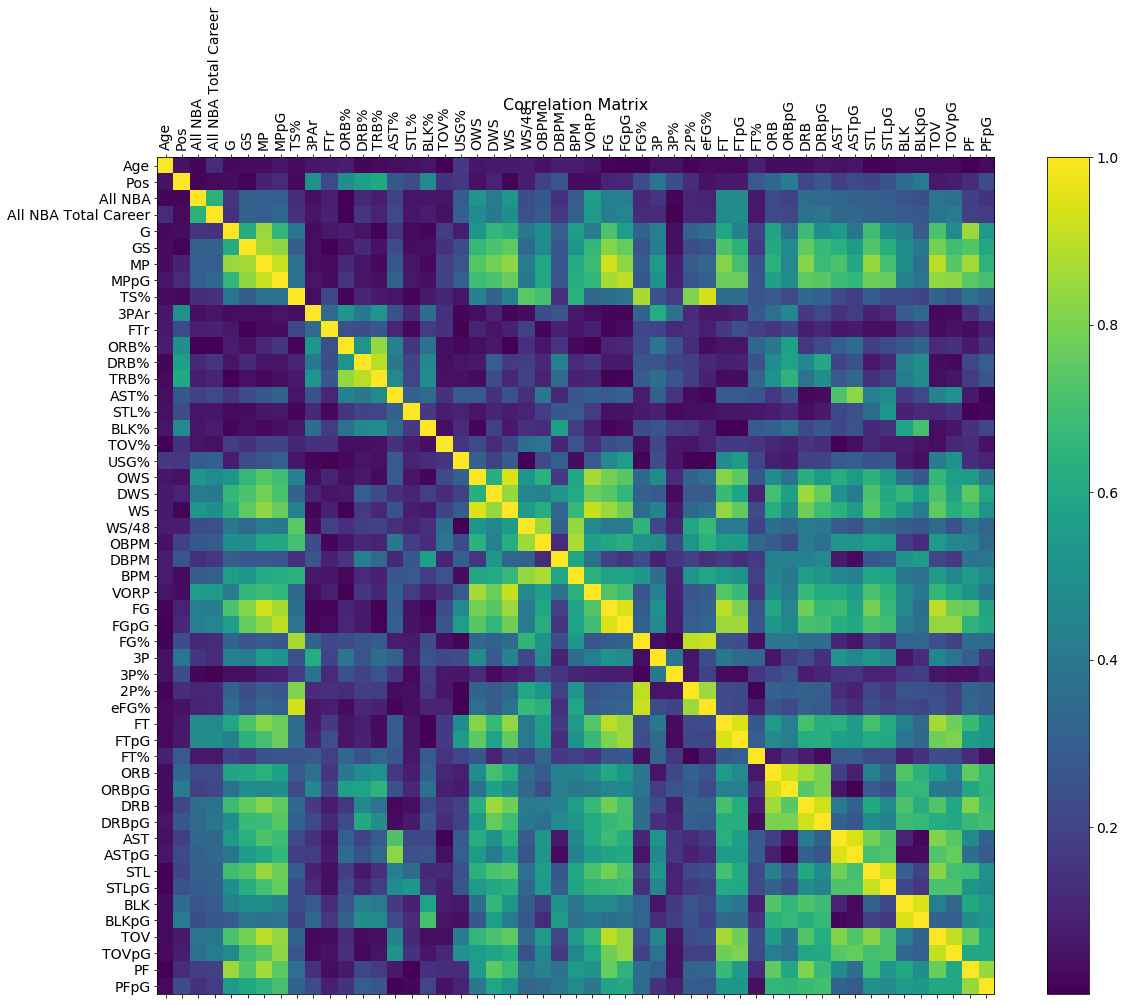

In [18]:
corr_matrixAdjusted = data.corr().abs()
f2 = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrixAdjusted, fignum=f2.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [21]:
data.describe()

,Age,Pos,All NBA,All NBA Total Career,G,GS,MP,MPpG,TS%,3PAr,...,AST,ASTpG,STL,STLpG,BLK,BLKpG,TOV,TOVpG,PF,PFpG
count,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,...,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.00000
mean,26.949505,5.904166,0.033718,0.496358,54.075211,26.483182,1280.981750,20.566208,0.507746,0.185184,...,117.721008,1.844758,41.714379,0.666454,26.458384,0.422179,76.029790,1.229888,115.083313,1.91911
std,4.213603,4.284325,0.180510,1.904681,24.976332,29.590902,925.777987,10.262107,0.086997,0.192845,...,139.487692,1.849850,37.332904,0.469495,36.990469,0.508466,64.856059,0.799250,76.999472,0.83143
min,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,24.000000,3.000000,0.000000,0.000000,35.000000,1.000000,425.500000,12.000000,0.478000,0.008000,...,21.000000,0.600000,11.000000,0.300000,4.000000,0.100000,22.000000,0.600000,47.000000,1.30000
50%,26.000000,6.000000,0.000000,0.000000,62.000000,12.000000,1196.000000,19.900000,0.519000,0.128000,...,69.000000,1.200000,33.000000,0.600000,13.000000,0.300000,61.000000,1.100000,114.000000,1.90000
75%,30.000000,9.000000,0.000000,0.000000,76.000000,53.000000,2035.000000,29.200000,0.552000,0.325000,...,162.000000,2.500000,62.000000,0.900000,33.000000,0.500000,113.000000,1.700000,173.000000,2.50000
max,44.000000,15.000000,1.000000,15.000000,85.000000,83.000000,3533.000000,43.700000,1.136000,1.000000,...,1164.000000,14.500000,246.000000,3.000000,376.000000,4.600000,464.000000,5.700000,371.000000,6.00000


   All NBA          G
1        1  74.650485
0        0  53.357246


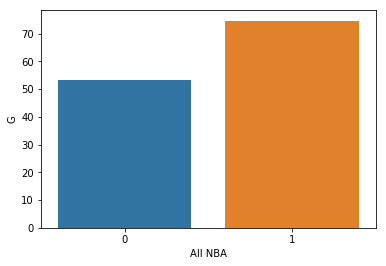

   All NBA         GS
1        1  74.242718
0        0  24.816634


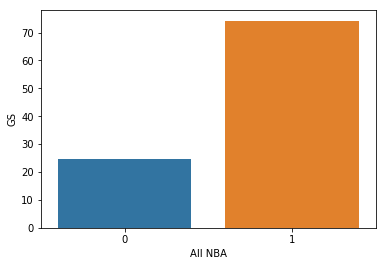

   All NBA           MP
1        1  2760.230583
0        0  1229.364021


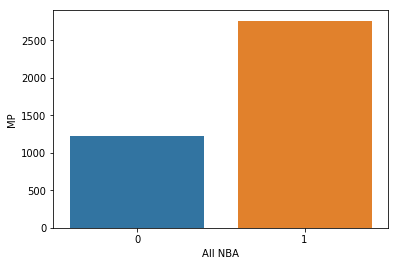

   All NBA       MPpG
1        1  36.951699
0        0  19.994444


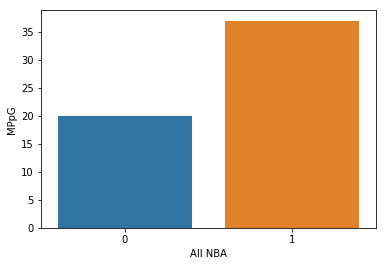

   All NBA       TS%
1        1  0.569359
0        0  0.505597


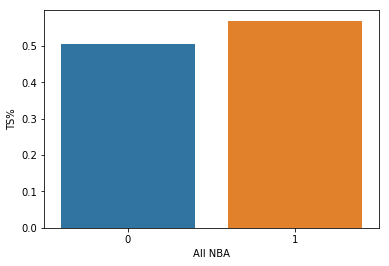

   All NBA      3PAr
0        0  0.186732
1        1  0.140823


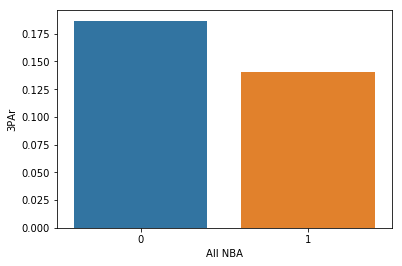

   All NBA       FTr
1        1  0.414359
0        0  0.312271


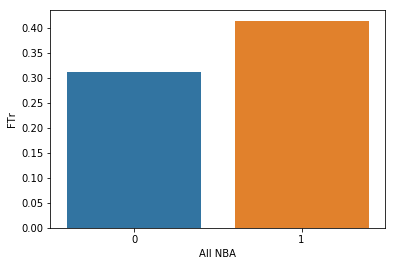

   All NBA      ORB%
1        1  6.151942
0        0  6.097324


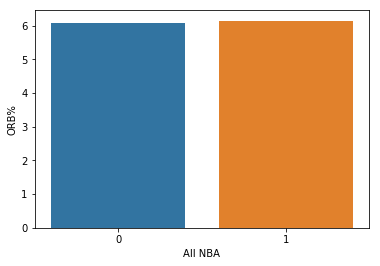

   All NBA       DRB%
1        1  17.859466
0        0  13.923317


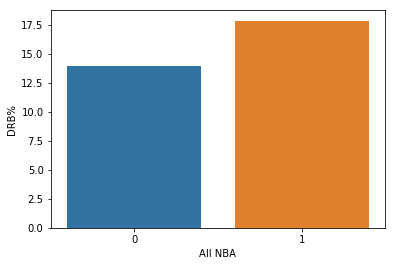

   All NBA       TRB%
1        1  12.119417
0        0  10.007970


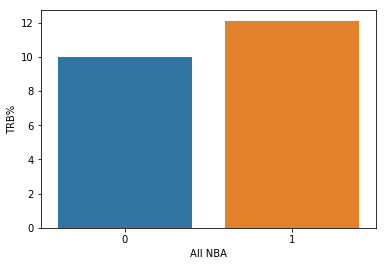

   All NBA       AST%
1        1  23.246359
0        0  12.685873


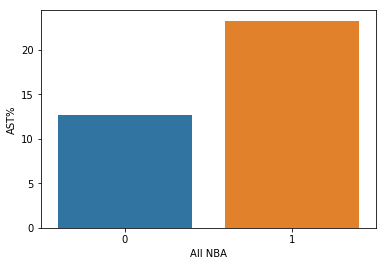

   All NBA      STL%
1        1  1.928155
0        0  1.631549


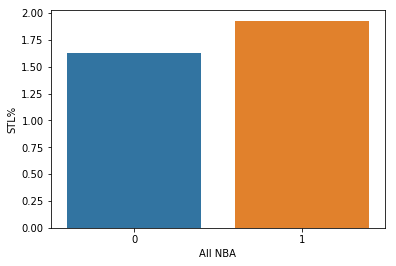

   All NBA      BLK%
1        1  2.112379
0        0  1.523630


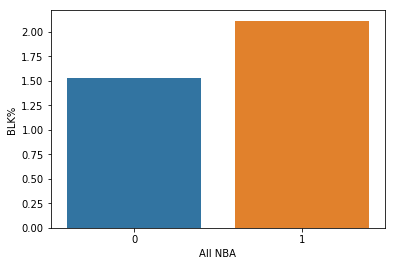

   All NBA       TOV%
0        0  14.557915
1        1  12.693689


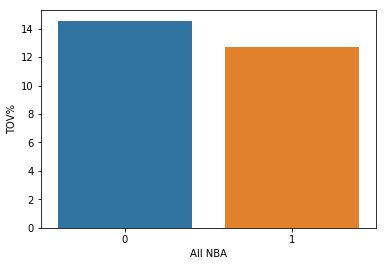

   All NBA       USG%
1        1  27.227427
0        0  18.566147


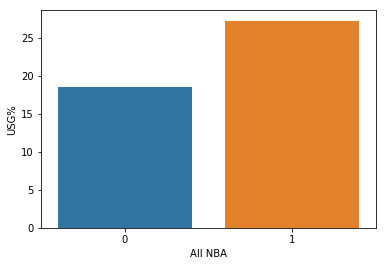

   All NBA       OWS
1        1  7.329126
0        0  1.198747


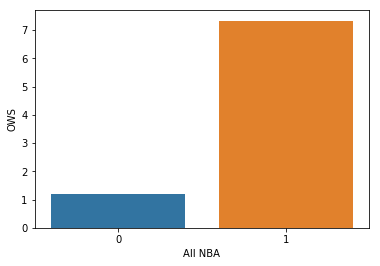

   All NBA       DWS
1        1  4.046602
0        0  1.212569


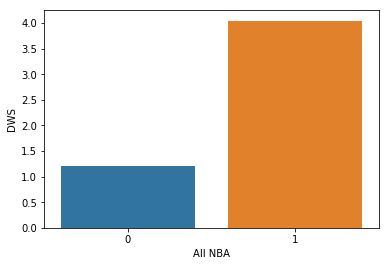

   All NBA         WS
1        1  11.372816
0        0   2.412349


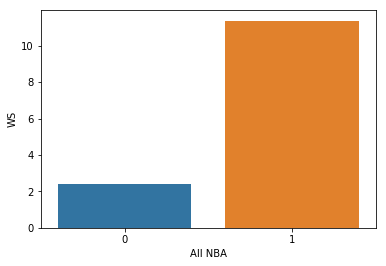

   All NBA     WS/48
1        1  0.197347
0        0  0.068425


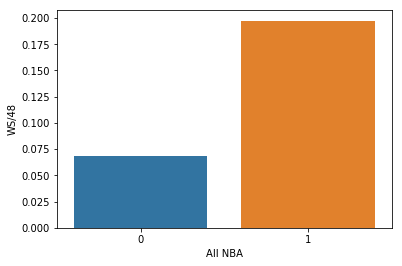

   All NBA      OBPM
1        1  3.807767
0        0 -1.745939


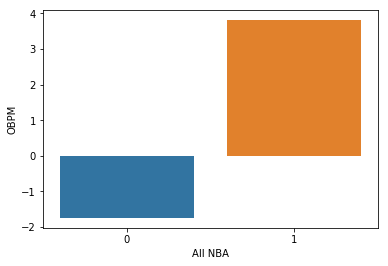

   All NBA      DBPM
1        1  1.158738
0        0 -0.492250


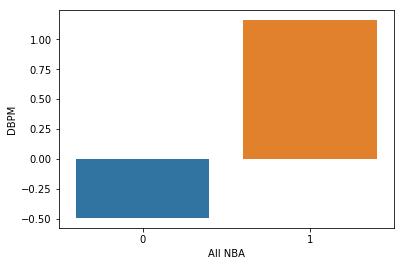

   All NBA      BPM
1        1  4.96432
0        0 -2.23774


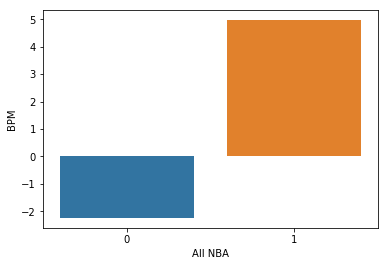

   All NBA      VORP
1        1  4.891990
0        0  0.496138


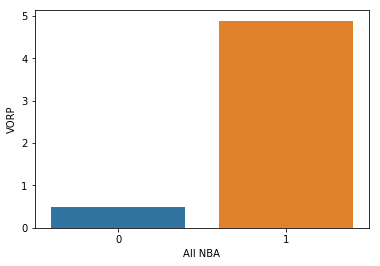

   All NBA          FG
1        1  609.223301
0        0  183.814686


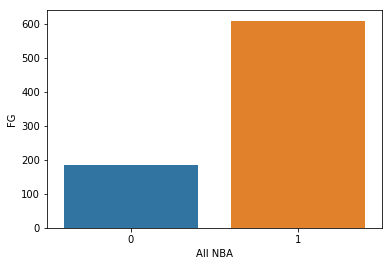

   All NBA      FGpG
1        1  8.164320
0        0  2.917151


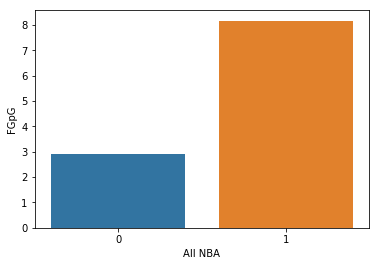

   All NBA       FG%
1        1  0.492364
0        0  0.435907


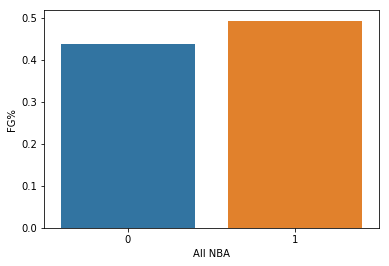

   All NBA         3P
1        1  64.842233
0        0  28.481494


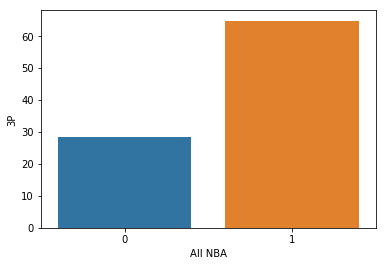

   All NBA       3P%
1        1  0.284951
0        0  0.272992


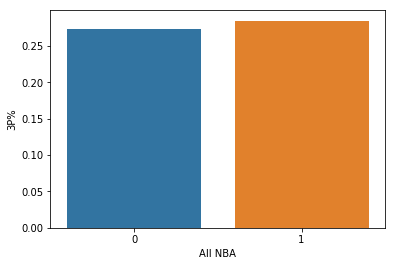

   All NBA       2P%
1        1  0.512199
0        0  0.456981


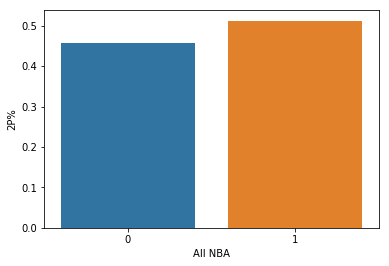

   All NBA      eFG%
1        1  0.517570
0        0  0.467033


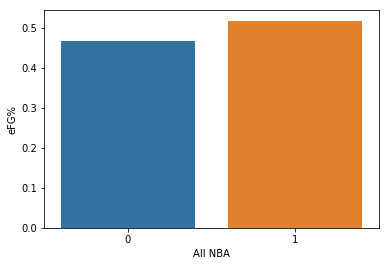

   All NBA          FT
1        1  388.165049
0        0   90.118743


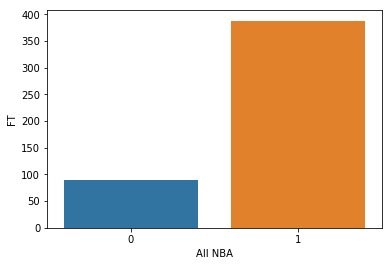

   All NBA      FTpG
1        1  5.191019
0        0  1.438105


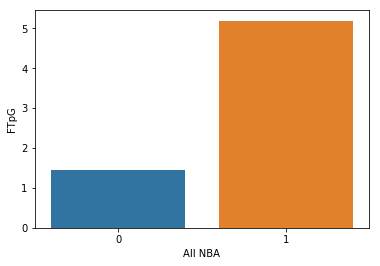

   All NBA       FT%
1        1  0.771126
0        0  0.721238


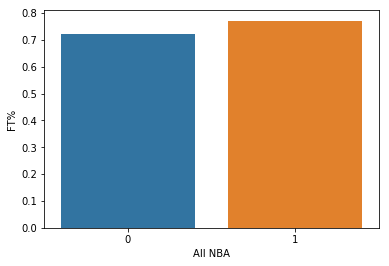

   All NBA         ORB
1        1  144.038835
0        0   60.899975


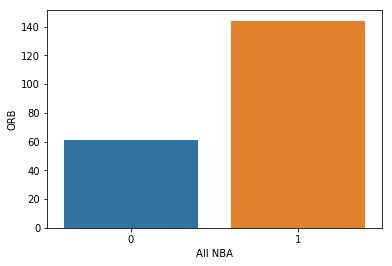

   All NBA     ORBpG
1        1  1.939320
0        0  0.999788


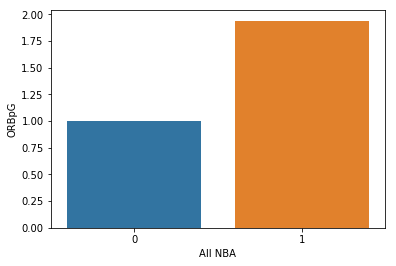

   All NBA         DRB
1        1  436.910194
0        0  150.576861


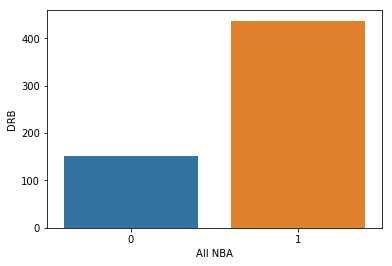

   All NBA     DRBpG
1        1  5.857039
0        0  2.441170


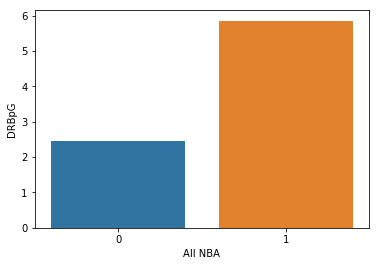

   All NBA         AST
1        1  368.398058
0        0  108.973744


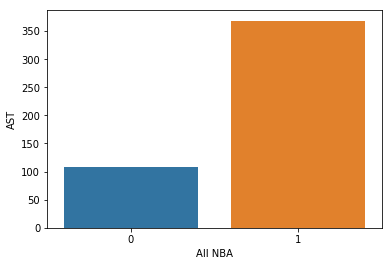

   All NBA     ASTpG
1        1  4.917476
0        0  1.737537


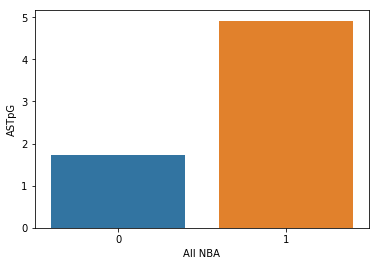

   All NBA         STL
1        1  103.752427
0        0   39.549589


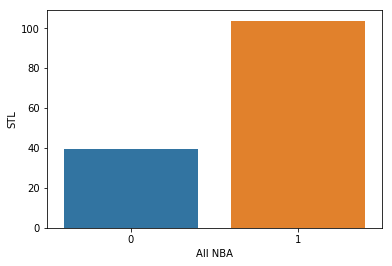

   All NBA     STLpG
1        1  1.387864
0        0  0.641281


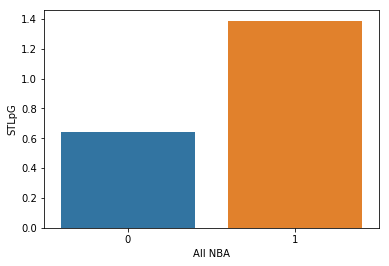

   All NBA        BLK
1        1  79.711165
0        0  24.600152


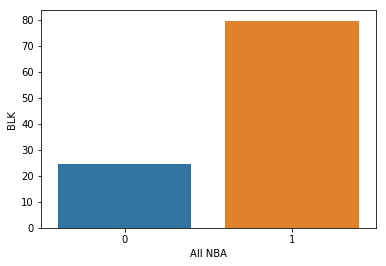

   All NBA     BLKpG
1        1  1.072816
0        0  0.399475


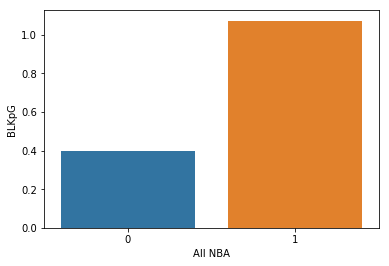

   All NBA         TOV
1        1  208.606796
0        0   71.403574


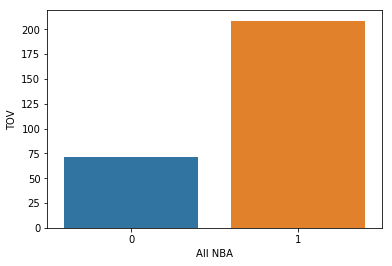

   All NBA     TOVpG
1        1  2.798544
0        0  1.175150


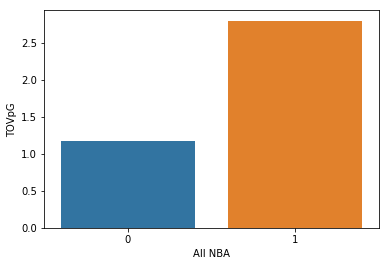

   All NBA          PF
1        1  192.536408
0        0  112.380622


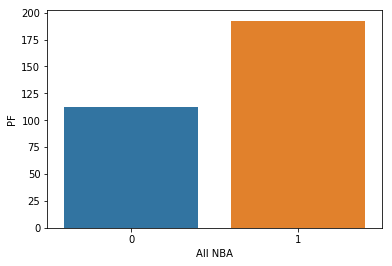

   All NBA      PFpG
1        1  2.579854
0        0  1.896053


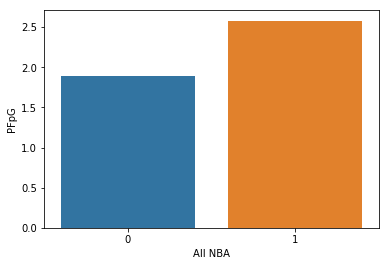

In [60]:
import seaborn as sns
for feature in data.columns[4:]:
    overview = data[['All NBA', feature]].groupby(['All NBA'], as_index=False).mean().sort_values(by=feature, ascending=False)
    print(overview)
    ax = sns.barplot(x="All NBA", y=feature, data=overview)
    plt.show()

In [22]:
# Split dataframe into train and test sets aiming for ALL NBA TOTAL CAREER

X = data.drop("All NBA Total Career", axis=1)
y = data["All NBA Total Career"]

test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(9775, 50) (9775,)
(2444, 50) (2444,)


In [23]:
# Train the linear regression algorithm using default parameters

r = LinearRegression()  
r.fit(X_train, y_train)
y_pred = r.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted All NBA': y_pred})
df1

,Actual,Predicted All NBA
12275,0,0.686990
14445,0,0.087262
2001,0,0.050346
11974,0,1.144915
14641,0,0.425237
11496,0,0.307298
9005,0,0.214591
4990,0,-0.197425
12132,0,-0.039092
4255,0,-0.064259


In [54]:
dfCoef_ = pd.DataFrame()
dfCoef_['Feature'] = X.columns
dfCoef_['Coefficient'] = r.coef_
dfCoef_

,Feature,Coefficient
0,Age,0.050795
1,Pos,0.012725
2,All NBA,3.891310
3,G,0.015925
4,GS,0.004187
5,MP,-0.000607
6,MPpG,-0.065128
7,TS%,-3.394832
8,3PAr,0.183344
9,FTr,0.077433


In [76]:
print('R_Squared Score:', round(r2_score(y_test, y_pred),3))

R_Squared Score: 0.472


In [77]:
print('Mean Squared Error:', round(mean_squared_error(y_test, y_pred),3))

Mean Squared Error: 1.961


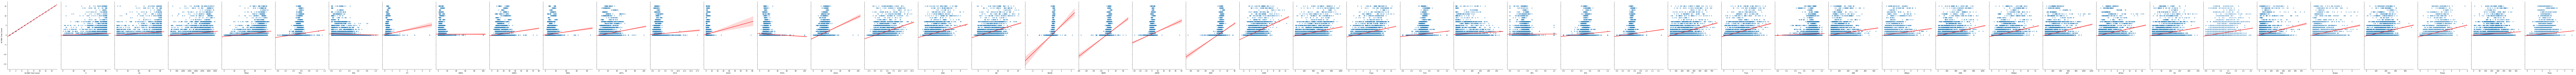

In [66]:
sns.pairplot(data, x_vars=data.columns[4:], y_vars='All NBA Total Career',
             markers="x", plot_kws={'line_kws':{'color':'red'}}, size=7, aspect=0.7, kind='reg')

In [67]:
dataCurrent = pd.read_csv('2019Data.csv')

In [68]:
# Drop the same irrelevant features

names = dataCurrent['Player']
dataCurrent = dataCurrent.drop('Player', axis=1)
years = dataCurrent['Year']
dataCurrent = dataCurrent.drop('Year', axis=1)
dataCurrent = dataCurrent.drop('PER', axis=1)

# dataCurrent = dataCurrent.drop('All NBA', axis=1)
accAllNBA = dataCurrent['All NBA Acc']
dataCurrent = dataCurrent.drop('All NBA Acc', axis=1)
dataCurrent.head()

,Age,Pos,All NBA,All NBA Total Career,G,GS,MP,MPpG,TS%,3PAr,...,STL,STLpG,BLK,BLKpG,TOV,TOVpG,PF,PFpG,PTS,PTSpG
0,20,9,0,0,72,72,2318,32.2,0.545,0.433,...,77,1.1,25,0.3,247,3.4,137,1.9,1526,21.2
1,20,9,0,0,17,17,577,34.0,0.625,0.467,...,25,1.5,3,0.2,79,4.6,44,2.6,512,30.1
2,20,0,0,2,82,82,2627,32.0,0.590,0.076,...,58,0.7,138,1.7,183,2.2,245,3.0,1503,18.3
3,21,0,0,2,82,82,3030,37.0,0.618,0.186,...,57,0.7,103,1.3,212,2.6,241,2.9,2061,25.1
4,22,0,1,2,82,82,2918,35.6,0.646,0.243,...,64,0.8,115,1.4,159,1.9,285,3.5,1743,21.3


In [69]:
# Drop previously highly correlated features from new dataframe

for feature in to_drop:
    if (feature == 'All NBA Total Career'):
        continue
    dataCurrent = dataCurrent.drop(feature, axis=1)

In [70]:
X2019 = dataCurrent.drop('All NBA Total Career', axis=1)
y2019 = dataCurrent['All NBA Total Career']

In [71]:
print(X2019.shape)
print(y2019.shape)

(27, 50)
(27,)


In [72]:
# Use previous model to predict All NBA Total Career based on current career's stats and subtract accumulated All NBA Selections
# to get the remaining number of All NBA Selections

y2019_pred = r.predict(X2019)
df3 = pd.DataFrame({'Season': years, 'Player': names, 'Predicted All NBA': y2019_pred, 'Remaining': y2019_pred - accAllNBA})
df3

,Season,Player,Predicted All NBA,Remaining
0,2019,Luka Doncic,2.445718,2.445718
1,2020,Luka Doncic,5.698858,5.698858
2,2016,Karl-Anthony Towns,2.032980,2.032980
3,2017,Karl-Anthony Towns,2.701954,2.701954
4,2018,Karl-Anthony Towns,6.530418,5.530418
5,2019,Karl-Anthony Towns,7.004790,5.004790
6,2020,Karl-Anthony Towns,8.083463,6.083463
7,2012,Kyrie Irving,1.385079,1.385079
8,2013,Kyrie Irving,1.690431,1.690431
9,2014,Kyrie Irving,1.360015,1.360015


In [73]:
df3.loc[df3['Remaining'] < 0, 'Remaining'] = 0

In [74]:
df3.round()

,Season,Player,Predicted All NBA,Remaining
0,2019,Luka Doncic,2.0,2.0
1,2020,Luka Doncic,6.0,6.0
2,2016,Karl-Anthony Towns,2.0,2.0
3,2017,Karl-Anthony Towns,3.0,3.0
4,2018,Karl-Anthony Towns,7.0,6.0
5,2019,Karl-Anthony Towns,7.0,5.0
6,2020,Karl-Anthony Towns,8.0,6.0
7,2012,Kyrie Irving,1.0,1.0
8,2013,Kyrie Irving,2.0,2.0
9,2014,Kyrie Irving,1.0,1.0


Looking at the stats from 2019, the player with the highest total NBA Selections Remaining is Luka Doncic with 4, followed by Karl-Anthony Towns with 3, Kyrie Irving with 2, and finally Stephen Curry with 0.
In conclusion, the likelihood of each player having the greatest number of All NBA Selections remaining is derived by the previous numbers. Since the linear regressor already implies probability, the model predicts Luka Doncic to have the highest probability to receive the greatest number of All NBA Selections remaining followed by Towns, Irving, and Curry.